## Load packages

In [2]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 of the project

In [3]:
# Load the market result data
Scen = [66,61,22,81,33,64,13]
Scen_lowD = [66,61,22,81]
Scen_highD = [33,64,13]

data_lowD={}
data_highD={}
data_All={}

# Set the name of labels for each scenario
Leg_low = {66:"Medium D, Medium CF",61:"Low D, Low CF",22:"Low D, Medium CF",81:"Low D, High CF"}
Leg_high = {33:"High D, Low CF",64:"High D, Medium CF",13:"High D, High CF"}
Leg_All = {66:"Medium D, Medium CF",61:"Low D, Low CF",22:"Low D, Medium CF",81:"Low D, High CF",33:"High D, Low CF",64:"High D, Medium CF",13:"High D, High CF"}

# Read the data from the result of part 1
for i in Scen_lowD:
    data_lowD[i] = pd.read_csv("%.0f_market_result.csv"%i)
    data_lowD[i].set_index("WindCapacity")
    
for i in Scen_highD:
    data_highD[i] = pd.read_csv("%.0f_market_result.csv"%i)
    data_highD[i].set_index("WindCapacity")

for i in Scen:
    data_All[i] = pd.read_csv("%.0f_market_result.csv"%i)
    data_All[i].set_index("WindCapacity")
    

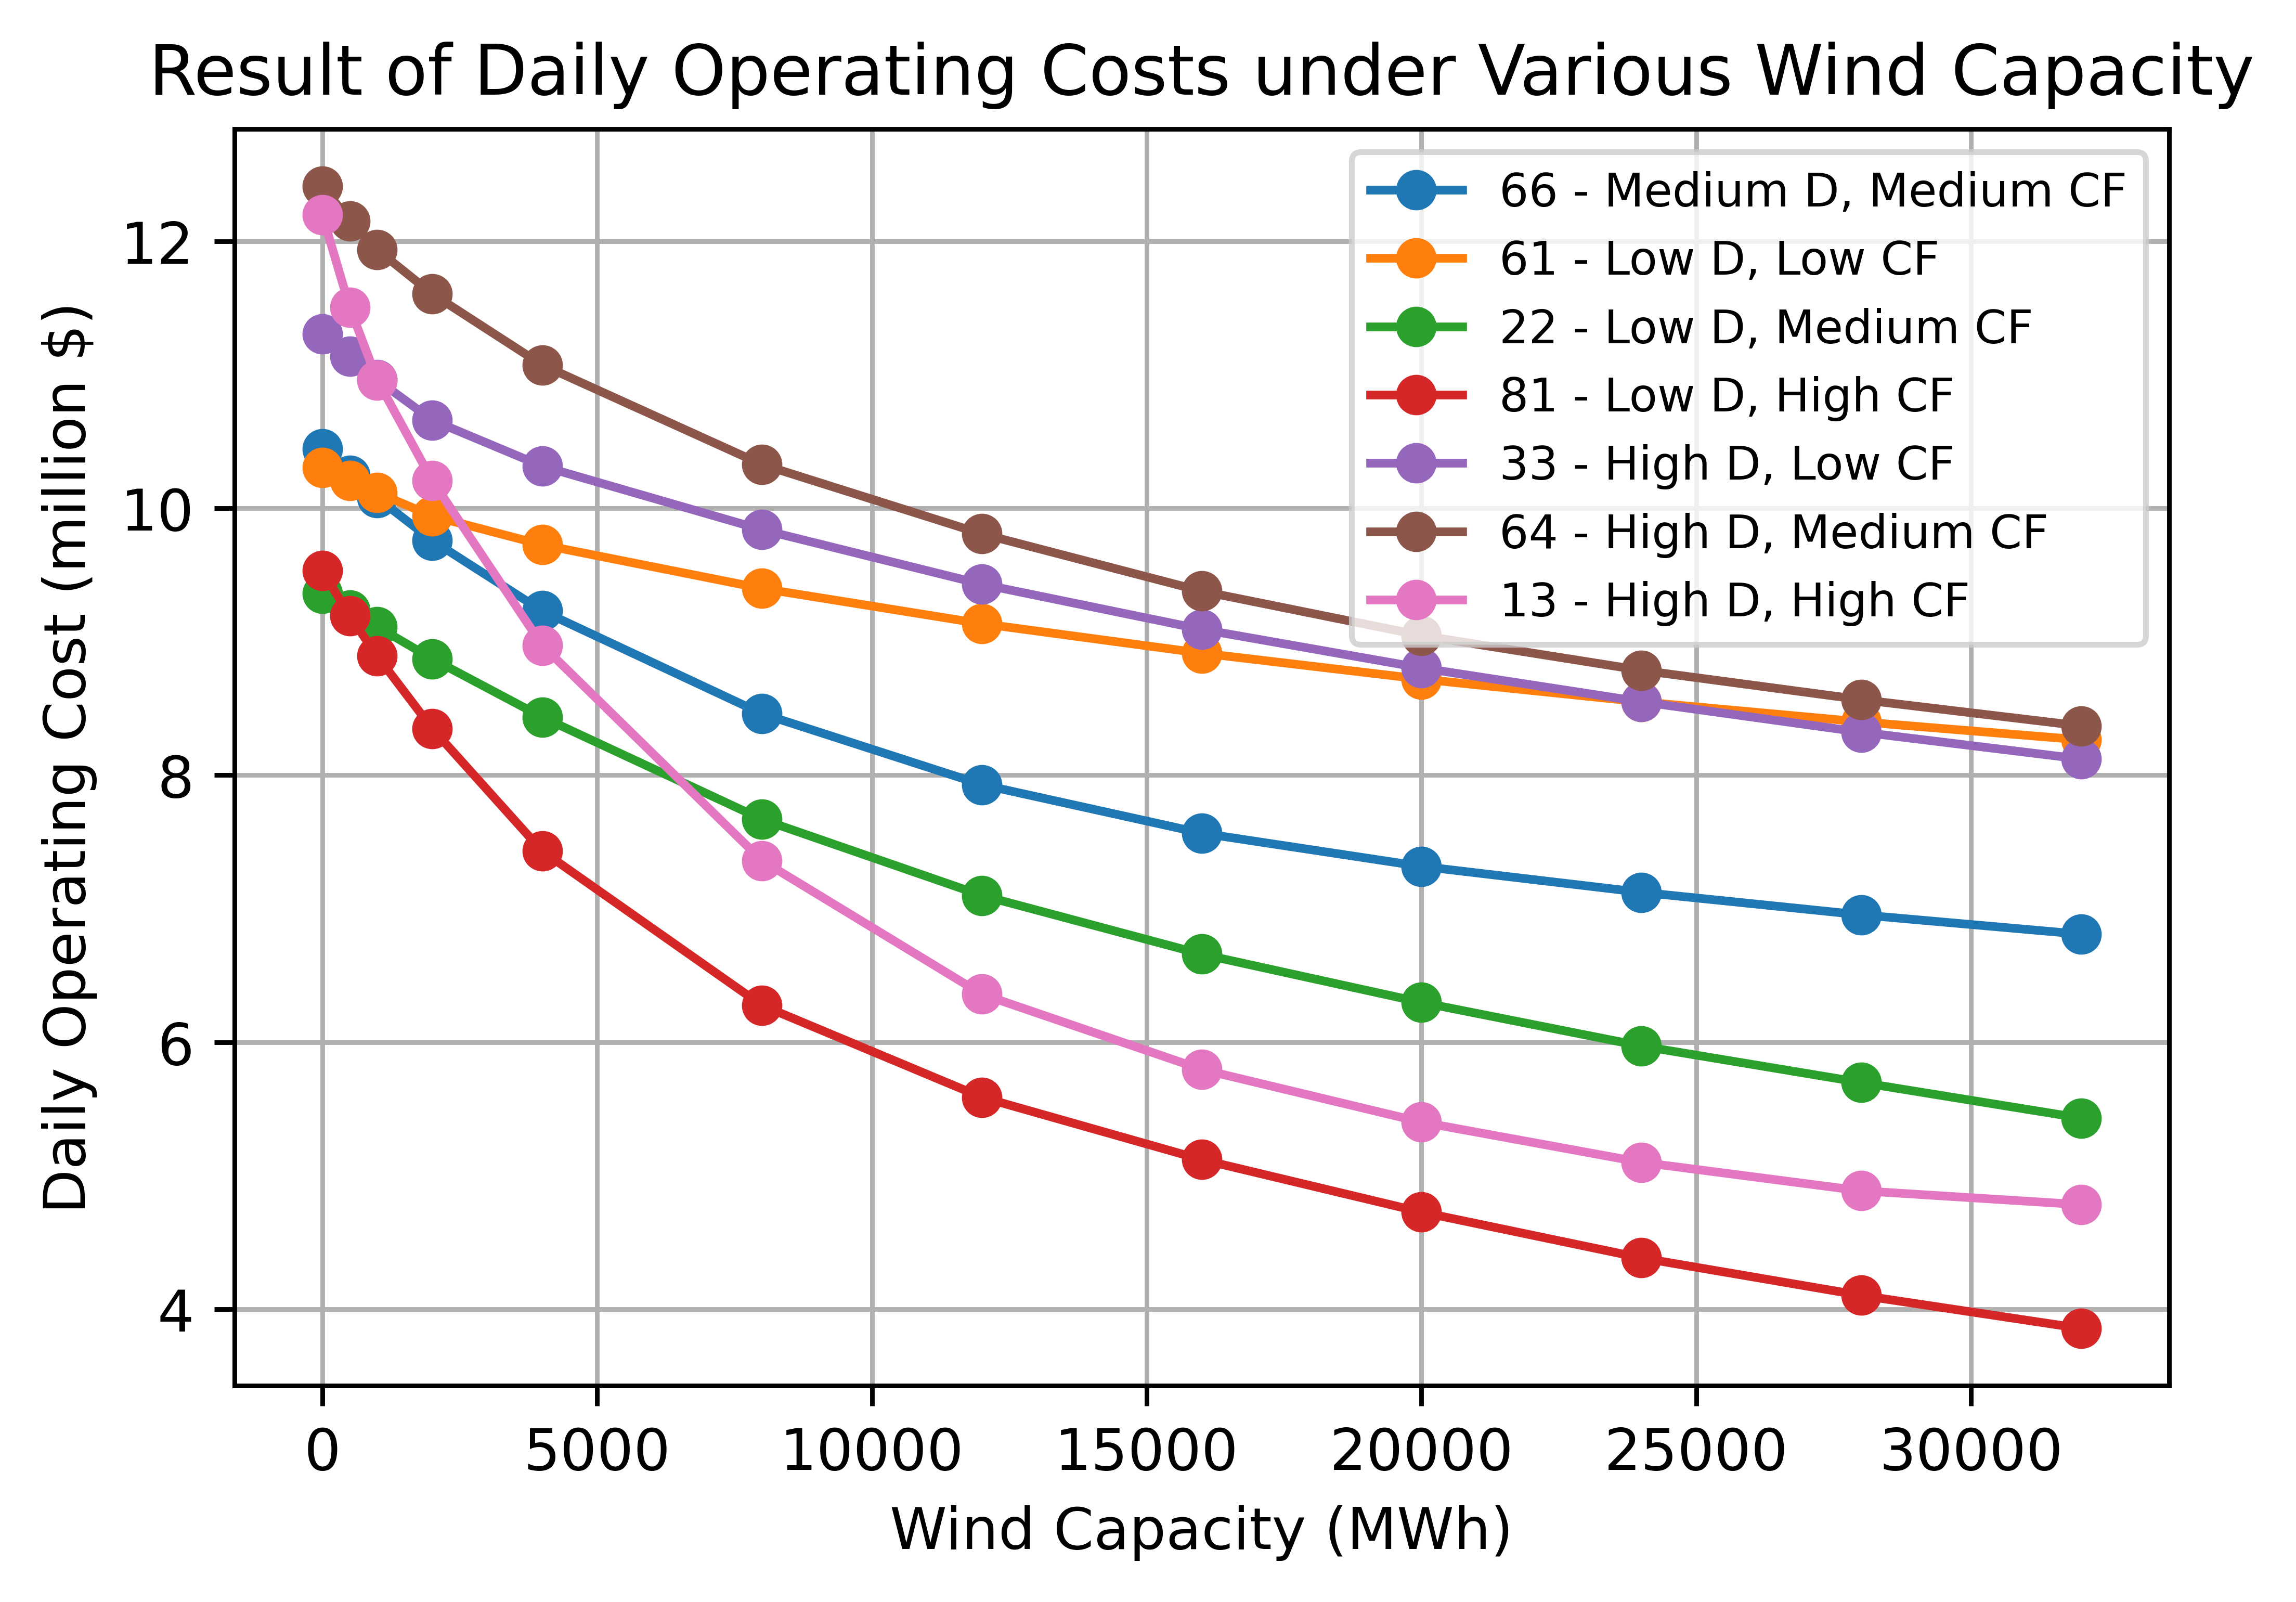

In [103]:
# Plot Daily Operating Cost of all scenarios
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)

for i in Scen_lowD:
    ax.plot(data_lowD[i]["WindCapacity"],data_lowD[i]["operating cost"]/1000000, 'o-', label = "%.0f - %s"%(i,Leg_low[i]))
    
for i in Scen_highD:
    ax.plot(data_highD[i]["WindCapacity"],data_highD[i]["operating cost"]/1000000, 'o-', label = "%.0f - %s"%(i,Leg_high[i]))
    
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Daily Operating Cost (million $)")
ax.legend(prop={"size":8})
ax.grid()
plt.title("Result of Daily Operating Costs under Various Wind Capacity")
plt.savefig("All Daily Operating Cost.jpg", dpi = 800)
    

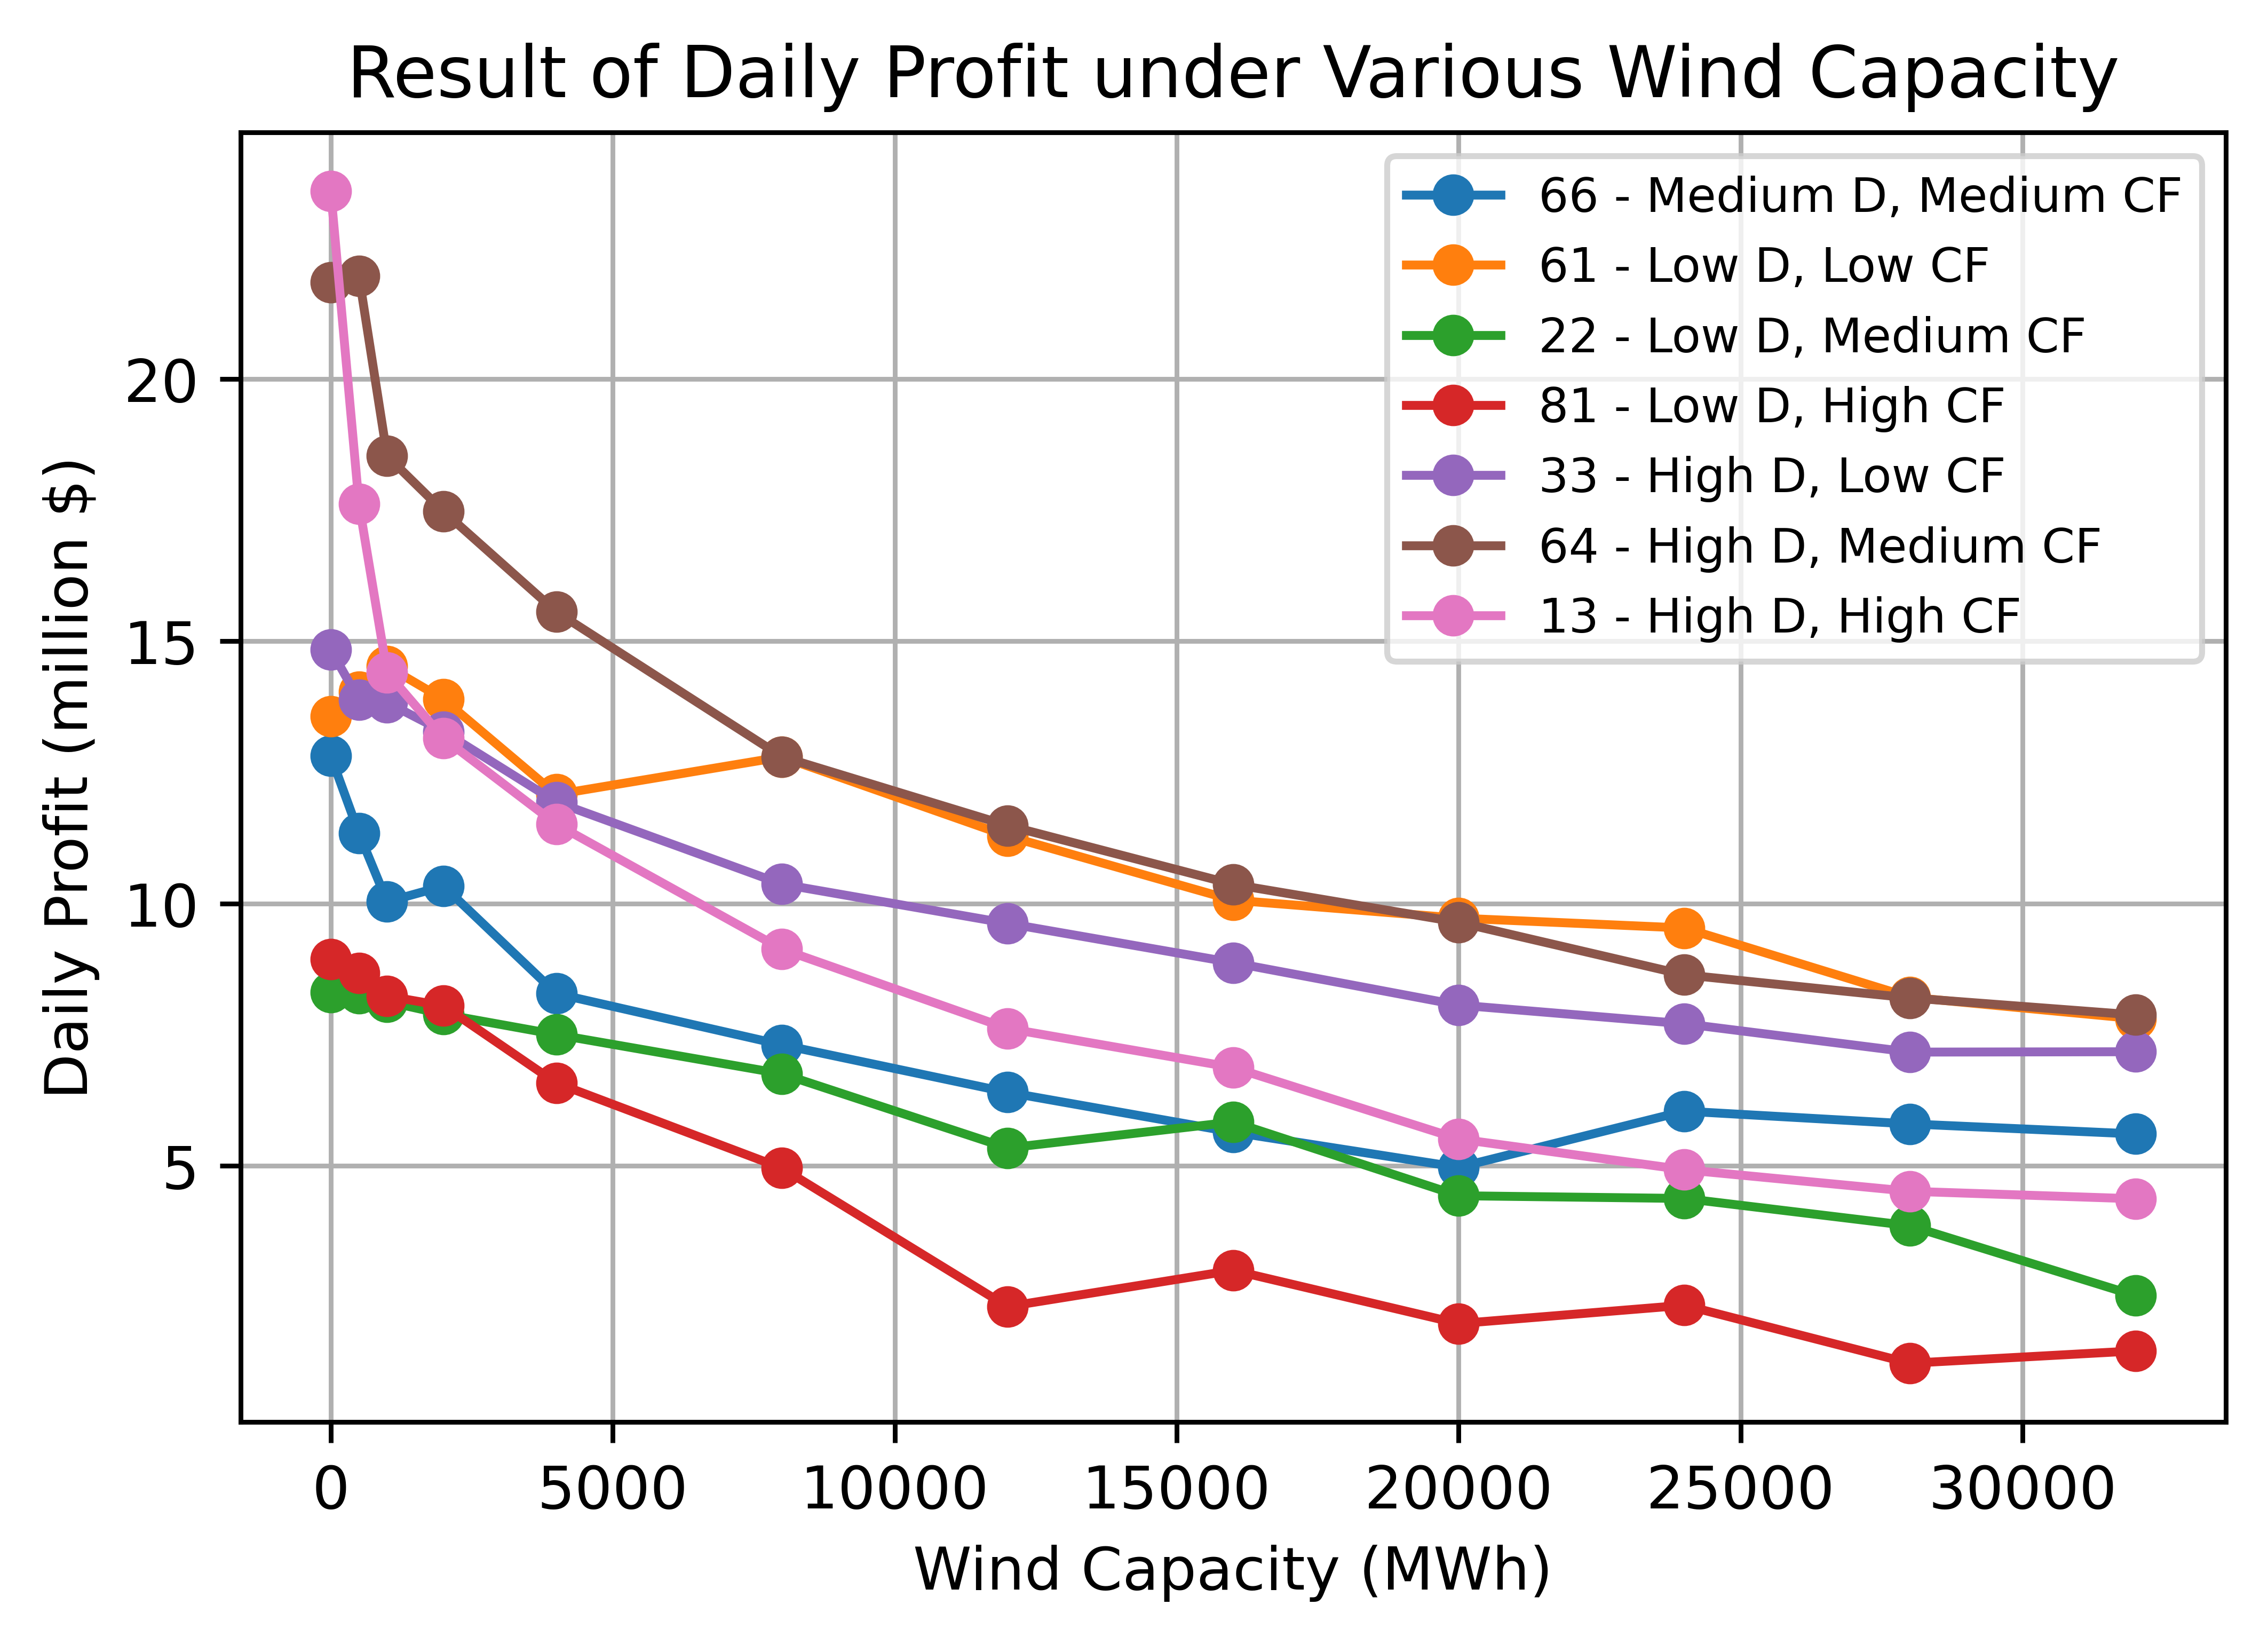

In [104]:
# Plot Daily Profit of all scenarios
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)

for i in Scen_lowD:
    ax.plot(data_lowD[i]["WindCapacity"],data_lowD[i]["profit"]/1000000, 'o-', label = "%.0f - %s"%(i,Leg_low[i]))
    
for i in Scen_highD:
    ax.plot(data_highD[i]["WindCapacity"],data_highD[i]["profit"]/1000000, 'o-', label = "%.0f - %s"%(i,Leg_high[i]))
    
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Daily Profit (million $)")
ax.legend(prop={"size":8})
ax.grid()
plt.title("Result of Daily Profit under Various Wind Capacity")
plt.savefig("All Daily Profit.jpg", dpi = 800)
    

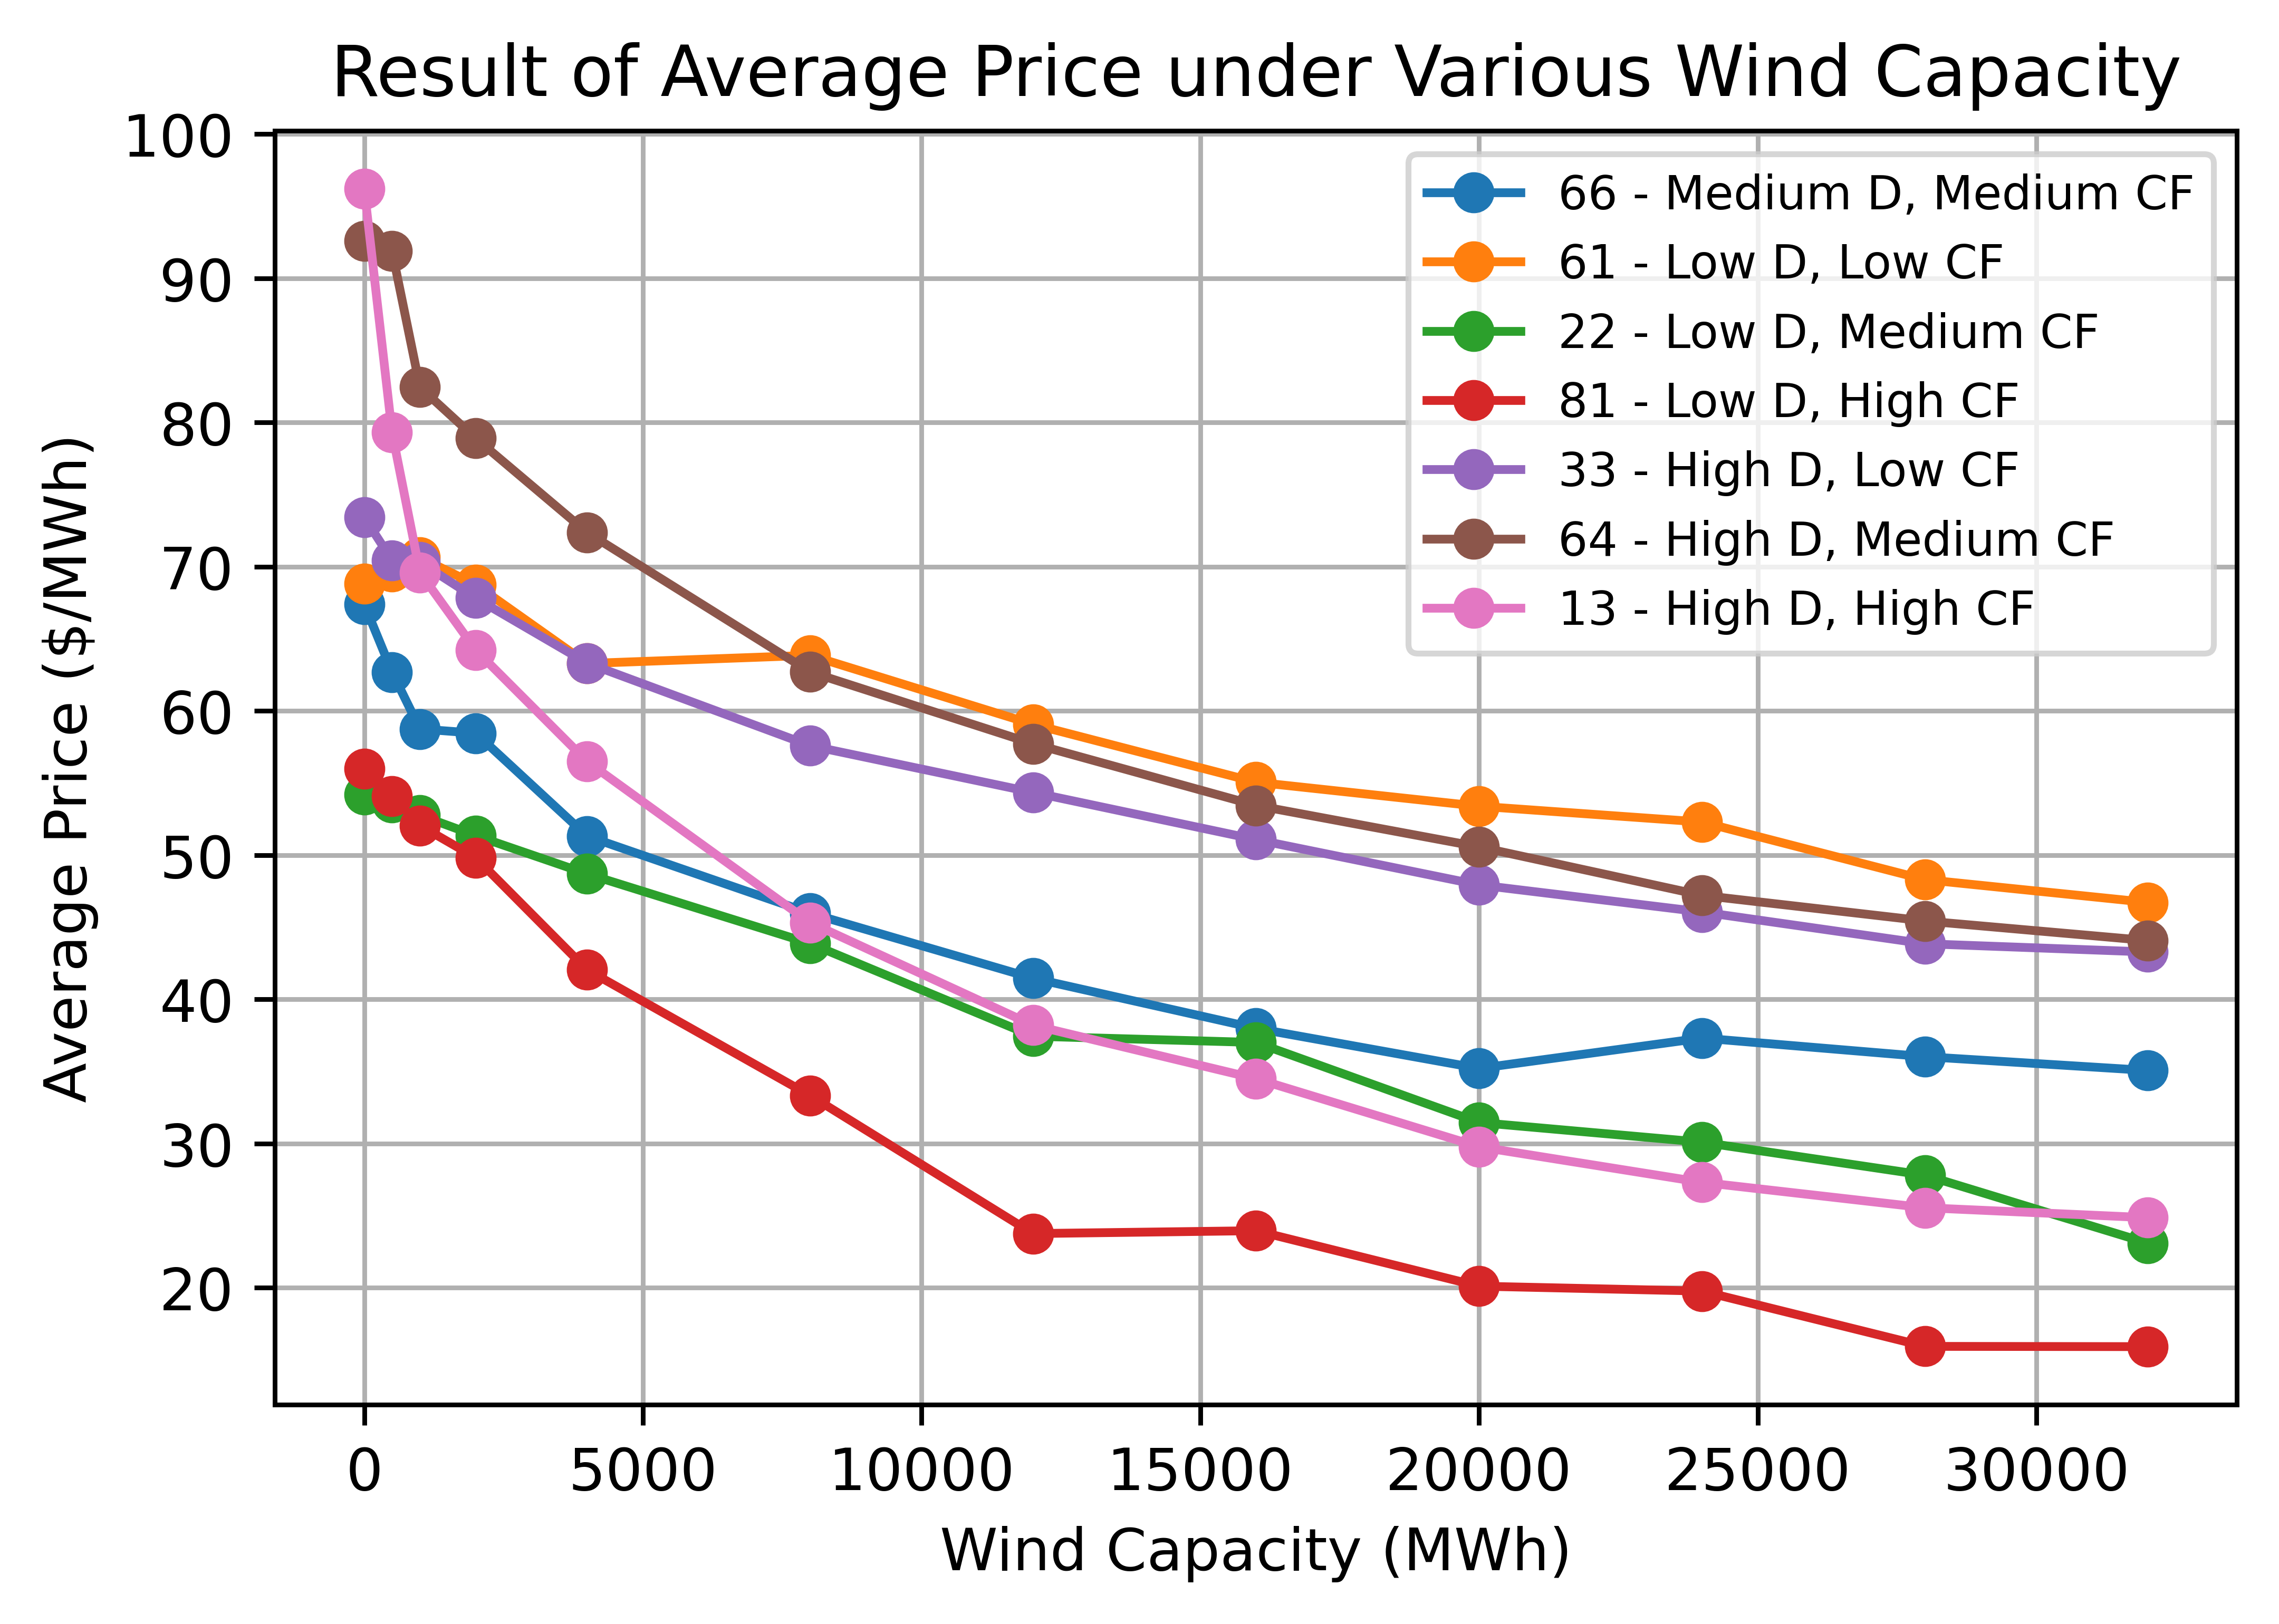

In [105]:
# Plot Average Price of all scenarios
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)

for i in Scen_lowD:
    ax.plot(data_lowD[i]["WindCapacity"],data_lowD[i]["price"], 'o-', label = "%.0f - %s"%(i,Leg_low[i]))
    
for i in Scen_highD:
    ax.plot(data_highD[i]["WindCapacity"],data_highD[i]["price"], 'o-', label = "%.0f - %s"%(i,Leg_high[i]))
    
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Average Price ($/MWh)")
ax.legend(prop={"size":8})
ax.grid()
plt.title("Result of Average Price under Various Wind Capacity")
plt.savefig("All Average Price.jpg", dpi = 800)
    

In [67]:
# Read the given data
demand = pd.read_csv("demand.csv")
generator = pd.read_csv("generator_data.csv")
windCF = pd.read_csv("windCF.csv")
generator = generator.set_axis(["Num","Loc","Capacity","MinGen","FuelType","MinUp","MinDown","RR","SC","NLC","a","b"], axis = 1)

In [127]:
# Sum the coal generation of each scenario
data_GT = pd.DataFrame()
for i in Scen:
    Daily_Generation = []
    for j in data_All[i]["WindCapacity"]:
        temp = pd.read_csv(str("%.0f_GT_%.0f.csv"% (i,j)))
        temp = temp.drop('Unnamed: 0',axis=1)
        temp = temp[generator["FuelType"] == " BIT "].append(temp[generator["FuelType"] == " SUB "])
        Daily_Generation.append(temp.sum().sum()/4)
    data_GT[i] = Daily_Generation

data_GT.index = data_All[13]["WindCapacity"]

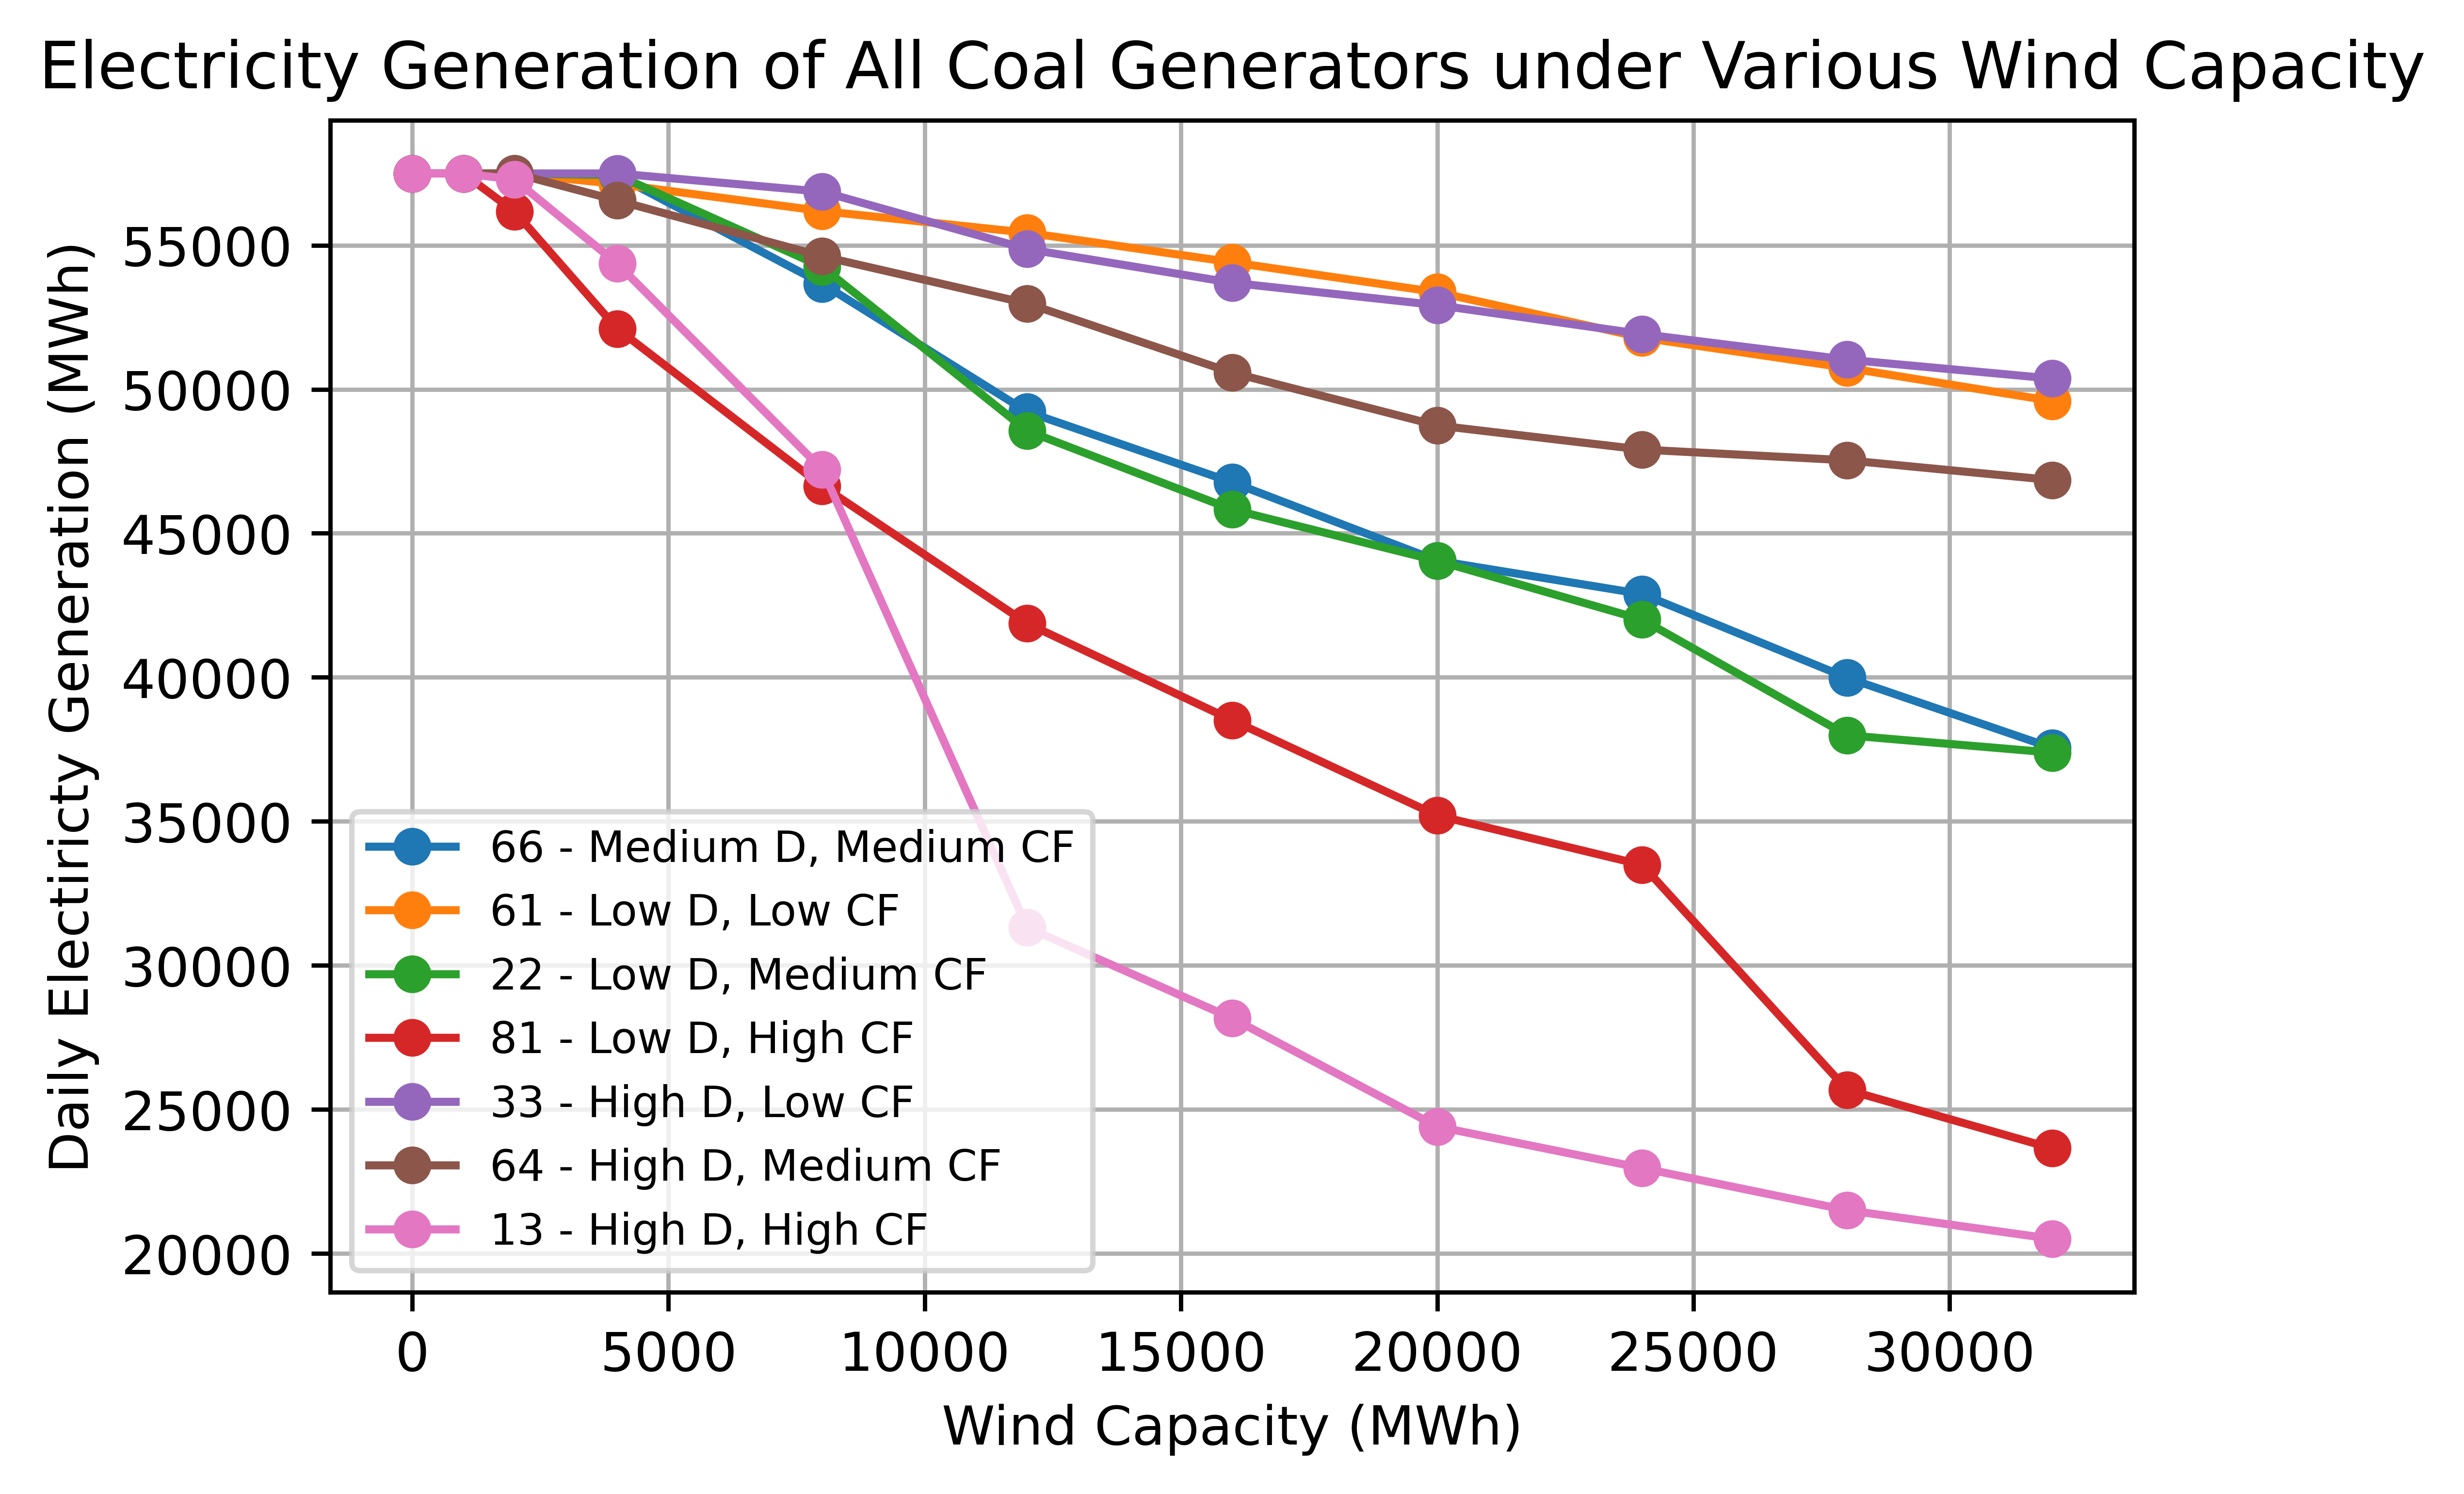

In [106]:
# Plot Coal Generation of all scenarios
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)

for i in Scen:
    ax.plot(data_GT.index,data_GT[i], 'o-', label = "%.0f - %s"%(i,Leg_All[i]))
    
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Daily Electiricty Generation (MWh)")
ax.legend(prop={"size":8})
ax.grid()
plt.title("Electricity Generation of All Coal Generators under Various Wind Capacity")
plt.savefig("All Coal Generation.jpg", dpi = 800)

## Part 2 of the project

In [91]:
# Calculate the difference of cost after mandatory shutdown all coal generators
data_1 = {}
data_2 = {}
data_difference = {}

for i in Scen:
    data_1[i] = pd.read_csv("%.0f_market_result.csv"%i)
    data_1[i] = data_1[i].drop(data_1[i][data_1[i]["WindCapacity"] == 500].index,axis = 0)
    data_1[i] = data_1[i].reset_index()
    data_1[i] = data_1[i].drop(["index","price","profit"],axis = 1)
    data_2[i] = pd.read_csv("%.0f_market_result2.csv"%i)
    data_difference[i] = data_2[i] - data_1[i]
    data_difference[i]["WindCapacity"] = data_1[i]["WindCapacity"]
    data_difference[i].index = data_difference[i]["WindCapacity"]

In [92]:
# Sum the generation of coal electricity of each scenario
data_GT = pd.DataFrame()
for i in Scen:
    Daily_Generation = []
    for j in data_All[i]["WindCapacity"]:
        temp = pd.read_csv(str("%.0f_GT_%.0f.csv"% (i,j)))
        temp = temp.drop('Unnamed: 0',axis=1)
        temp = temp[generator["FuelType"] == " BIT "].append(temp[generator["FuelType"] == " SUB "])
        Daily_Generation.append(temp.sum().sum()/4)
    data_GT[i] = Daily_Generation

data_GT.index = data_All[13]["WindCapacity"]
data_GT = data_GT.drop(data_GT[data_GT.index == 500].index,axis = 0)

In [93]:
# Divide the two data for unit cost
data_cost = {}
for i in Scen:
    data_cost[i] = pd.DataFrame()
    data_cost[i]["WindCapacity"] = data_difference[i]["WindCapacity"]
    data_cost[i]["unit cost"] = data_difference[i]["operating cost"] / data_GT[i]

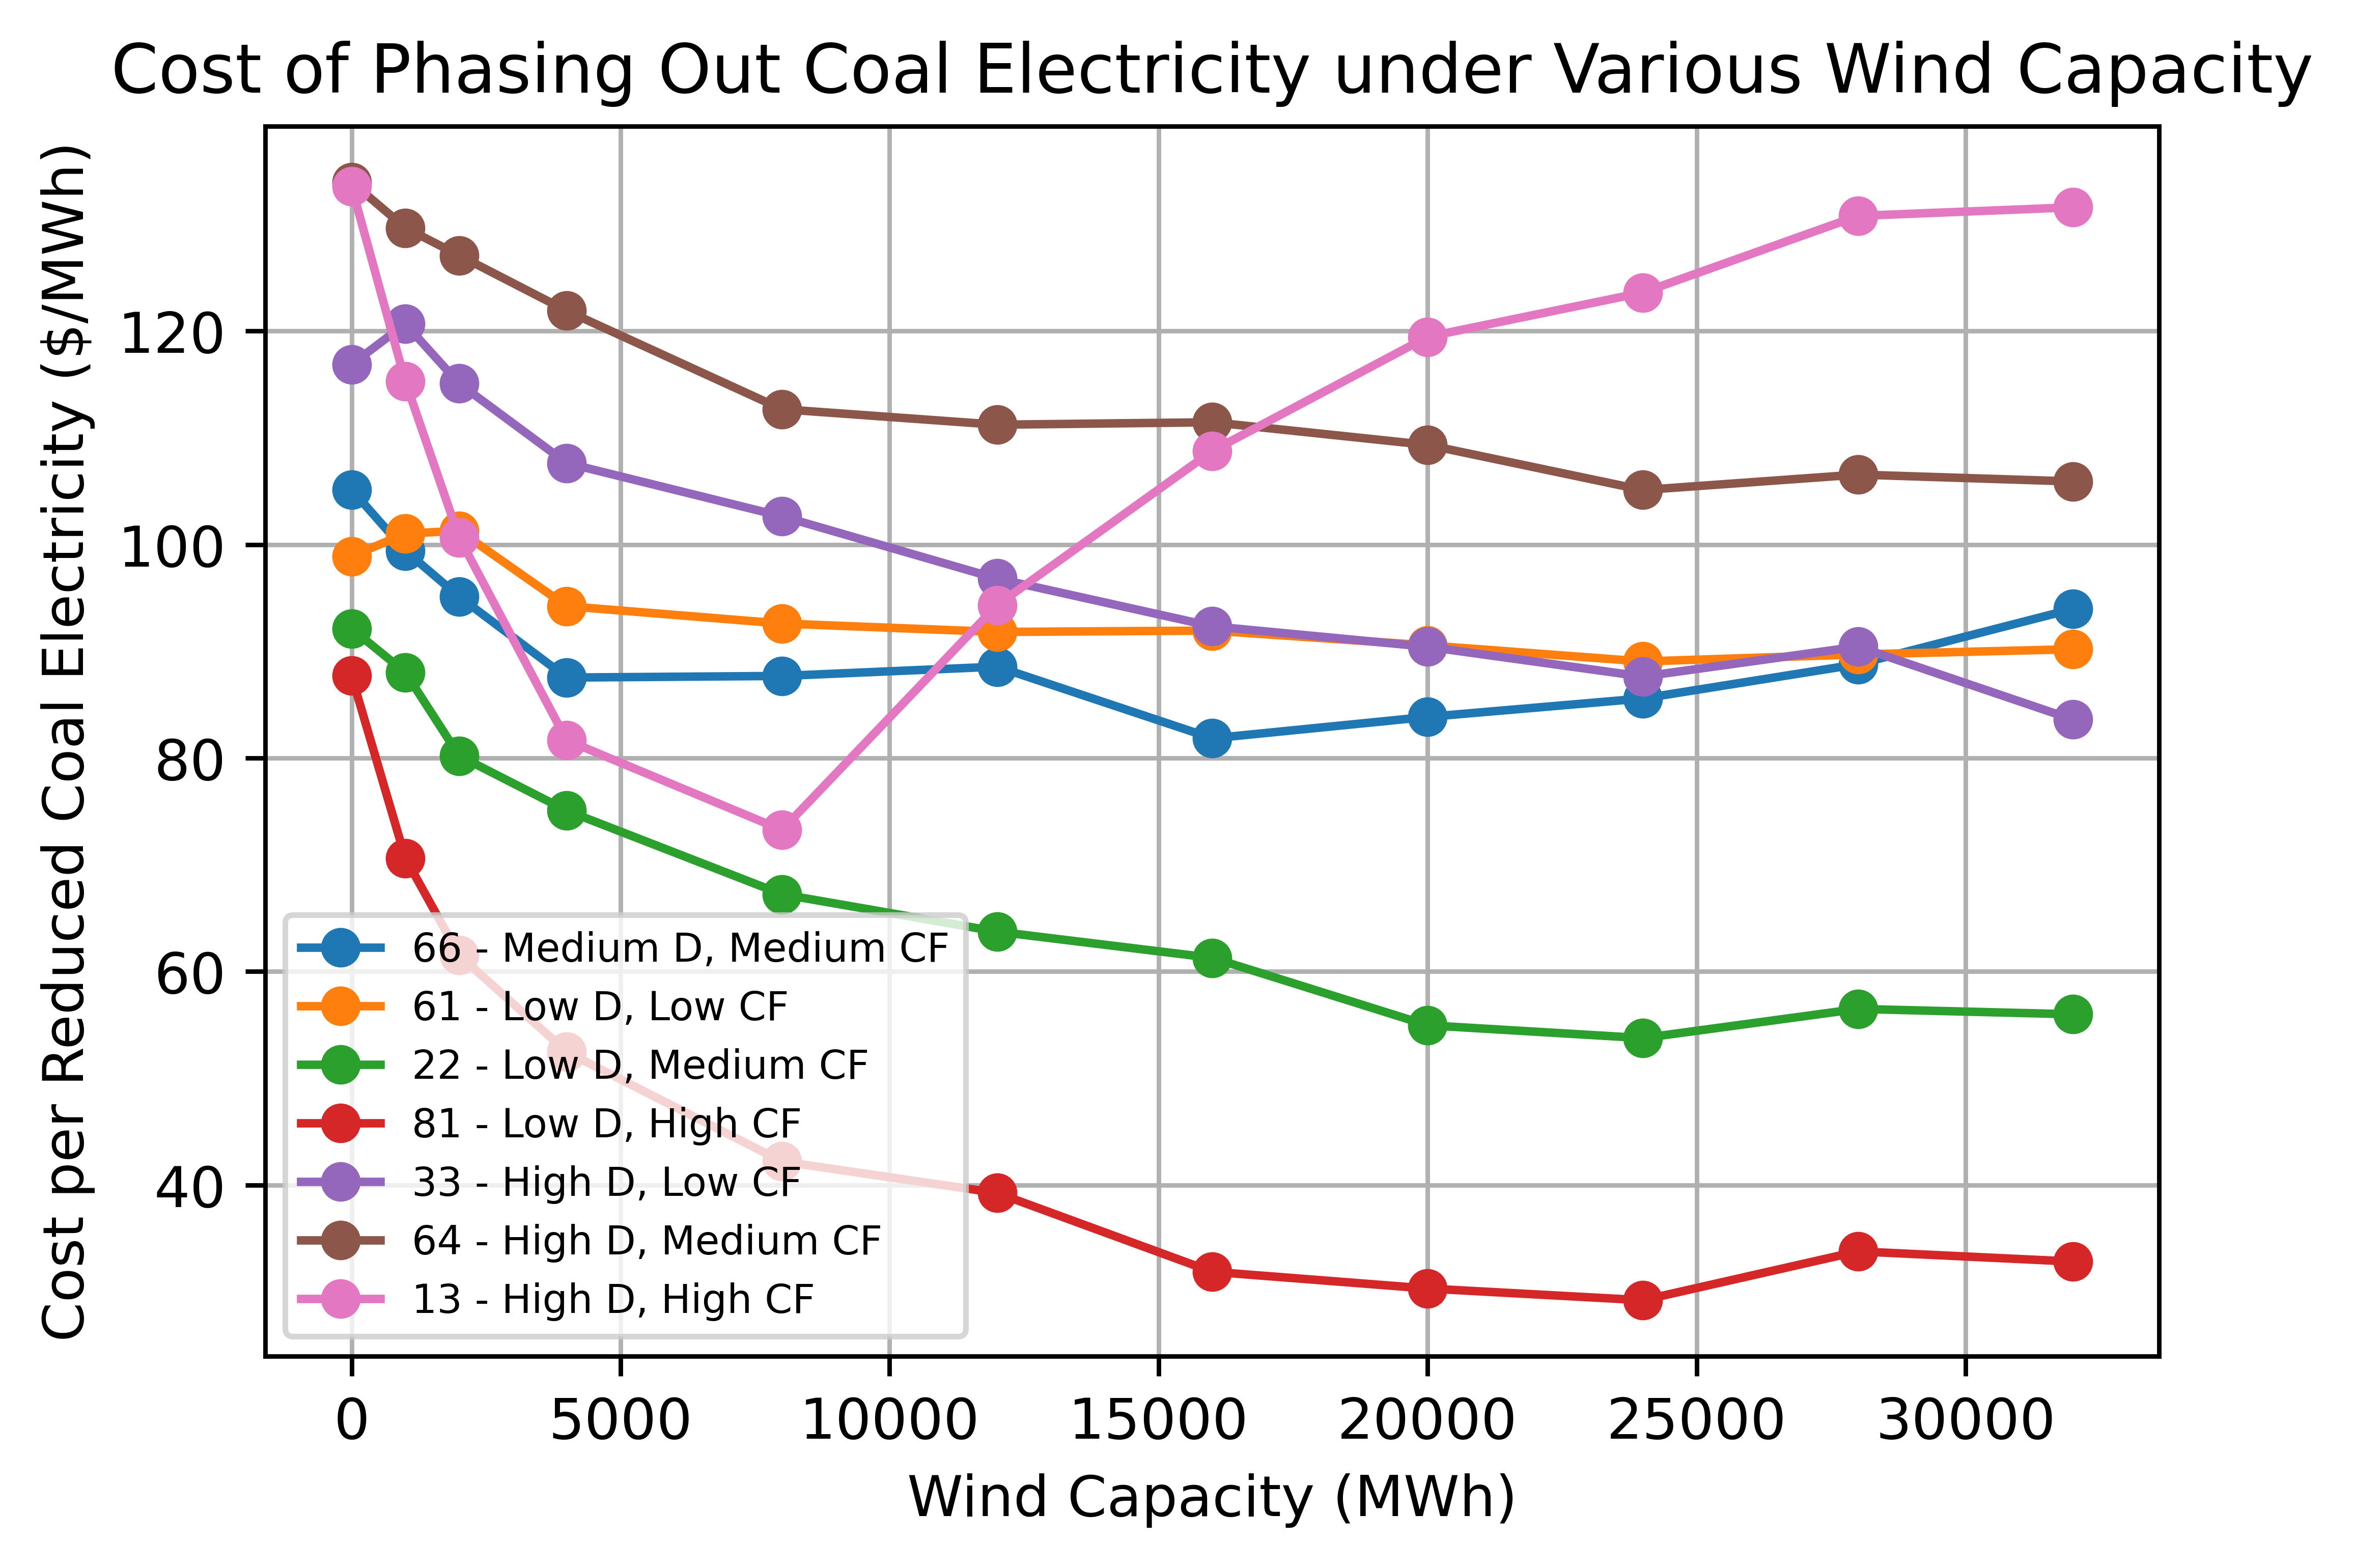

In [107]:
# Plot the unit cost of phasing out coal electricity
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)

for i in Scen:
    ax.plot(data_cost[i]["WindCapacity"],data_cost[i]["unit cost"], 'o-', label = "%.0f - %s"%(i,Leg_All[i]))
    ax.set_xlabel("Wind Capacity (MWh)")
    ax.set_ylabel("Cost per Reduced Coal Electricity ($/MWh)")
    ax.legend(prop={"size":7})
    ax.grid()
    plt.title("Cost of Phasing Out Coal Electricity under Various Wind Capacity")
    plt.savefig("Cost of Phasing Out Coal Electricity.jpg", dpi = 800)

## Previous code for presentation

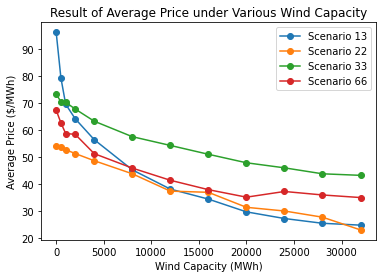

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in Scen:
    ax.plot(data[i]["WindCapacity"],data[i]["price"], 'o-', label = "Scenario %.0f"%i)
    ax.set_xlabel("Wind Capacity (MWh)")
    ax.set_ylabel(r"Average Price ($/MWh)")
    ax.legend()
    plt.title("Result of Average Price under Various Wind Capacity")
    plt.savefig("Average Price.jpg", dpi = 800)

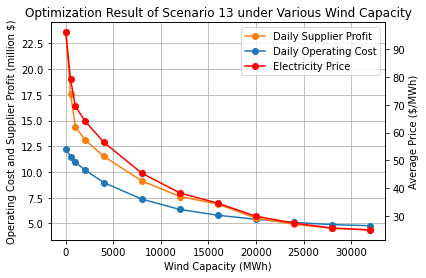

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(data[66]["WindCapacity"],data[13]["operating cost"]/1000000, 'o-', label = 'Daily Operating Cost')
lns2 = ax.plot(data[66]["WindCapacity"],data[13]["profit"]/1000000, 'o-', label = 'Daily Supplier Profit')
ax2 = ax.twinx()
lns3 = ax2.plot(data[66]["WindCapacity"],data[13]["price"], 'o-r', label = 'Electricity Price')
ax.grid()
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Operating Cost and Supplier Profit (million $)")
ax2.set_ylabel(r"Average Price ($/MWh)")
lns = lns2+lns1+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
#ax2.set_ylim(30, 69)
#ax.set_ylim(5.3, 13.5)
plt.title("Optimization Result of Scenario 13 under Various Wind Capacity")
plt.savefig("Scenario_%.0f.jpg"%13, dpi = 800)

In [5]:
demand = pd.read_csv("demand.csv")
generator = pd.read_csv("generator_data.csv")
windCF = pd.read_csv("windCF.csv")
generator = generator.set_axis(["Num","Loc","Capacity","MinGen","FuelType","MinUp","MinDown","RR","SC","NLC","a","b"], axis = 1)

In [118]:
generator["FuelType"]

0       NUC 
1       NUC 
2       NUC 
3       NUC 
4       NUC 
       ...  
71     NGTN 
72     NGTN 
73     NGTN 
74     NGTN 
75     NGTN 
Name: FuelType, Length: 76, dtype: object

In [119]:
generator.groupby("FuelType")

In [120]:
types = generator["FuelType"].value_counts().index

In [121]:
data_UT = {}

for i in data_All[13]["WindCapacity"]:
    data_UT[i] = pd.read_csv(str("13_UT_%.0f.csv"% i))
    data_UT[i] = data_UT[i].drop('Unnamed: 0',axis=1)
data_UT[0]

0    1    2    3    4    5    6    7    8    9  ...   86   87   88   89  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
1   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
71  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
73  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
75  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   

     90   91   92   93   94   95  
0   1.0  1.0  1.0  1.0  1.0  1.0  
1   1.0  1.0  1.0  1.0  1.0  1.0  
2   1.0  1.0  1.0  1.0  1.0  1.0  
3   1.0  1.0  1.0  1.0  1.0  1.0  
4   1.0  1.0  1.0  1.0  1.0  1.0  
..  ...  ...  ...  ...  ...  ...  
71  0.0  0.0  0.0  0.0  0.0  0.0  
72  0.0  0.0  0.0  0.0  0.0  0.0  
73  0.0  0.0  0.0  0.0  0.0  0.0  
74  0.0  0.0  0.0  0.0  0.0  0.0  
75  0.0  0.0  0.0  0.0  0.0  0.0  

[76 rows x 96 columns]

In [123]:
type_data = pd.DataFrame()

for t in types:
    QAQ = []
    for i in data_All[13]["WindCapacity"]:
        R = data_UT[i][generator["FuelType"] == t].sum().sum() / 96 / generator["FuelType"].value_counts()[t]
        QAQ.append(R)
    type_data[t] = QAQ
        

In [125]:
type_data.index = data_All[13]["WindCapacity"]

In [126]:
type_data.to_csv("13_Gen_UT.csv")

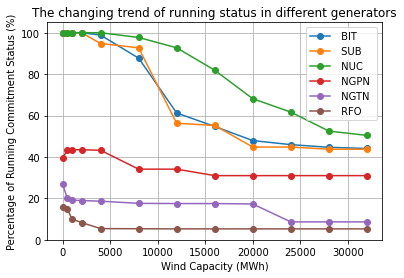

In [128]:
plt.plot(type_data.index, type_data[[" BIT ", " SUB "," NUC "," NGPN "," NGTN "," RFO "]] * 100, 'o-')
plt.ylim(0,105)
plt.legend([" BIT ", " SUB "," NUC "," NGPN "," NGTN "," RFO "])
plt.xlabel("Wind Capacity (MWh)")
plt.ylabel("Percentage of Running Commitment Status (%)")
plt.title("The changing trend of running status in different generators")
plt.grid()
plt.savefig("Status.jpg", dpi = 800)

In [17]:
RR = generator["RR"].value_counts().index
data_GT_RR = {}

for i in data_All[13]["WindCapacity"]:
    data_GT_RR[i] = pd.read_csv(str("13_UT_%.0f.csv"% i))
    data_GT_RR[i] = data_GT_RR[i].drop('Unnamed: 0',axis=1)
data_GT_RR[0]

0    1    2    3    4    5    6    7    8    9  ...   86   87   88   89  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
1   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
71  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
73  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
75  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   

     90   91   92   93   94   95  
0   1.0  1.0  1.0  1.0  1.0  1.0  
1   1.0  1.0  1.0  1.0  1.0  1.0  
2   1.0  1.0  1.0  1.0  1.0  1.0  
3   1.0  1.0  1.0  1.0  1.0  1.0  
4   1.0  1.0  1.0  1.0  1.0  1.0  
..  ...  ...  ...  ...  ...  ...  
71  0.0  0.0  0.0  0.0  0.0  0.0  
72  0.0  0.0  0.0  0.0  0.0  0.0  
73  0.0  0.0  0.0  0.0  0.0  0.0  
74  0.0  0.0  0.0  0.0  0.0  0.0  
75  0.0  0.0  0.0  0.0  0.0  0.0  

[76 rows x 96 columns]

In [18]:
RR_data = pd.DataFrame()

for t in RR:
    QAQ = []
    for i in data_All[13]["WindCapacity"]:
        R = data_GT_RR[i][generator["RR"] == t].sum().sum()/ 96 / generator["RR"].value_counts()[t]
        QAQ.append(R)
    RR_data[t] = QAQ

In [19]:
RR_data.index = data_All[13]["WindCapacity"]

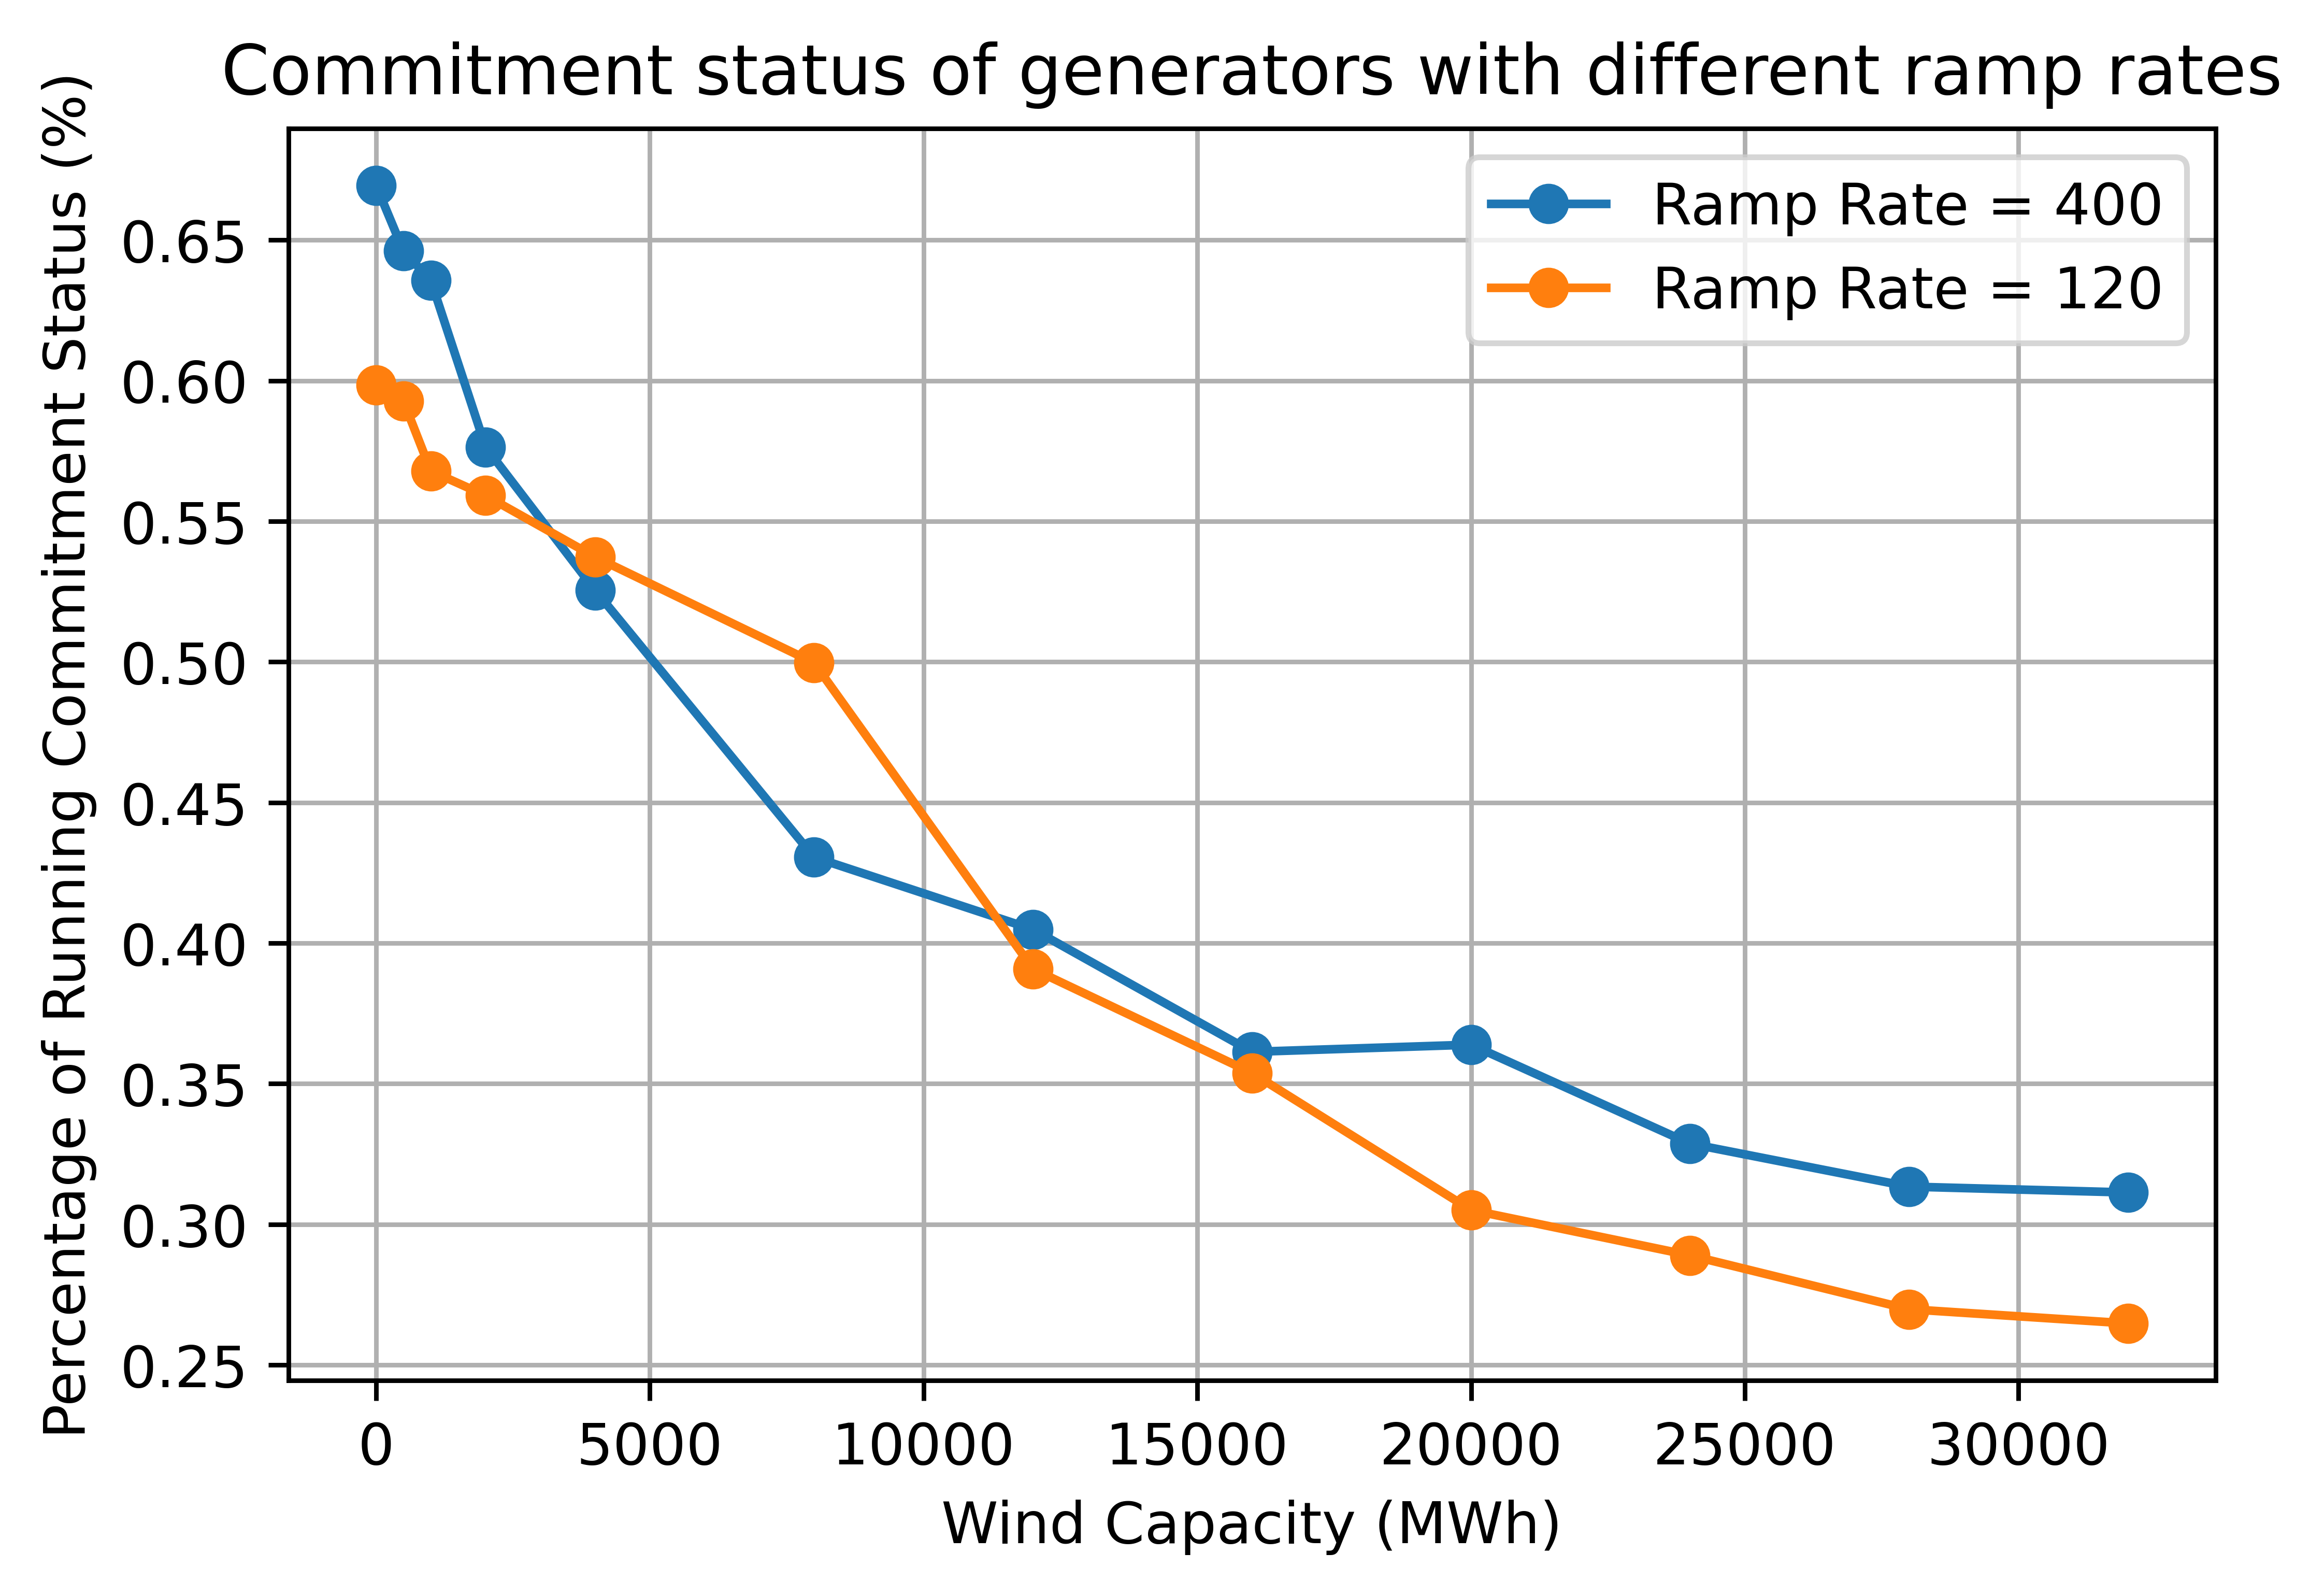

In [26]:
fig = plt.figure(figsize=(6,4), dpi=800)
ax = fig.add_subplot(111)
ax.plot(RR_data, 'o-')
#plt.ylim(0,105)
ax.legend(["Ramp Rate = 400","Ramp Rate = 120"])
plt.xlabel("Wind Capacity (MWh)")
plt.ylabel("Percentage of Running Commitment Status (%)")
plt.title("Commitment status of generators with different ramp rates")
plt.grid()
plt.savefig("RR_1.jpg", dpi = 800)